In [1]:
import sklearn.model_selection
import sklearn.datasets

In [2]:
from asforests import RandomForestClassifier

In [3]:
rf = RandomForestClassifier()

In [4]:
X, y = sklearn.datasets.load_iris(return_X_y = True)

In [9]:
rf.n_estimators

155

In [5]:
sklearn.model_selection.cross_validate(rf, X, y)

{'fit_time': array([0.1409955 , 0.13662457, 0.14139843, 0.13830566, 0.14125896]),
 'score_time': array([0.01042485, 0.01020193, 0.01049542, 0.01110148, 0.03848886]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])}

In [6]:
import numpy as np
import pandas as pd
import openml
import os, psutil
import gc
import logging
import traceback

from func_timeout import func_timeout, FunctionTimedOut

import time
import random

import itertools as it
import scipy.stats
from scipy.sparse import lil_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import sklearn
from sklearn import metrics
from sklearn import *

from func_timeout import func_timeout, FunctionTimedOut
from tqdm import tqdm

eval_logger = logging.getLogger("evalutils")


def get_dataset(openmlid):
    ds = openml.datasets.get_dataset(openmlid)
    df = ds.get_data()[0]
    num_rows = len(df)
        
    # prepare label column as numpy array
    print(f"Read in data frame. Size is {len(df)} x {len(df.columns)}.")
    X = np.array(df.drop(columns=[ds.default_target_attribute]).values)
    y = np.array(df[ds.default_target_attribute].values)
    if y.dtype != int:
        y_int = np.zeros(len(y)).astype(int)
        vals = np.unique(y)
        for i, val in enumerate(vals):
            mask = y == val
            y_int[mask] = i
        y = y_int
        
    print(f"Data is of shape {X.shape}.")
    return X, y

In [7]:
#X, y = sklearn.datasets.load_iris(return_X_y = True)
X, y = get_dataset(61)

Read in data frame. Size is 150 x 5.
Data is of shape (150, 4).


In [8]:
def mccv(learner, X, y, repeats):
    from tqdm.notebook import tqdm
    scores = []
    scorer = sklearn.metrics.get_scorer("neg_log_loss")
    for i in tqdm(range(repeats)):
        X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, random_state = i)
        learner_copy = sklearn.base.clone(learner)
        learner_copy.fit(X_train, y_train)
        scores.append(scorer(learner_copy, X_valid, y_valid))
    return scores

In [9]:
repeats = 20
scores_as = mccv(RandomForestClassifier(epsilon = 0.01, extrapolation_multiplier = 10**3), X, y, repeats)
scores_standard = mccv(sklearn.ensemble.RandomForestClassifier(n_estimators = 1000), X, y, repeats)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [10]:
import matplotlib.pyplot as plt

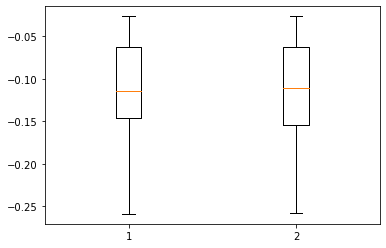

In [11]:
plt.boxplot([scores_as, scores_standard])
plt.show()

In [12]:
#X, y = sklearn.datasets.load_iris(return_X_y = True)
X, y = get_dataset(1457)

Read in data frame. Size is 1500 x 10001.
Data is of shape (1500, 10000).


In [13]:
repeats = 20
scores_as = mccv(RandomForestClassifier(epsilon = 0.001), X, y, repeats)
scores_standard = mccv(sklearn.ensemble.RandomForestClassifier(n_estimators = 1000), X, y, repeats)

  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
plt.boxplot([scores_as, scores_standard])
plt.show()